In [45]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import pickle as pkl
from scipy import stats
import matplotlib as mpl

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [73]:
s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-40C_5000km2_1800.p',
                        'rb'))

s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-50C_5000km2_1800.p',
                        'rb'))
s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-60C_5000km2_1800.p',
                        'rb'))
s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-70C_5000km2_1800.p',
                        'rb'))
s75 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-75C_5000km2_1800.p',
                        'rb'))

In [70]:
# s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4.5f-8.5fN_-40C_5000km2_1800.p',
#                         'rb'))

# s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-50C_5000km2_1800.p',
#                         'rb'))
# s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-60C_5000km2_1800.p',
#                         'rb'))
# s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-70C_5000km2_1800.p',
#                         'rb'))
# s75 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-12E_4f5-8f5N_-75C_5000km2_1800.p',
#                         'rb'))

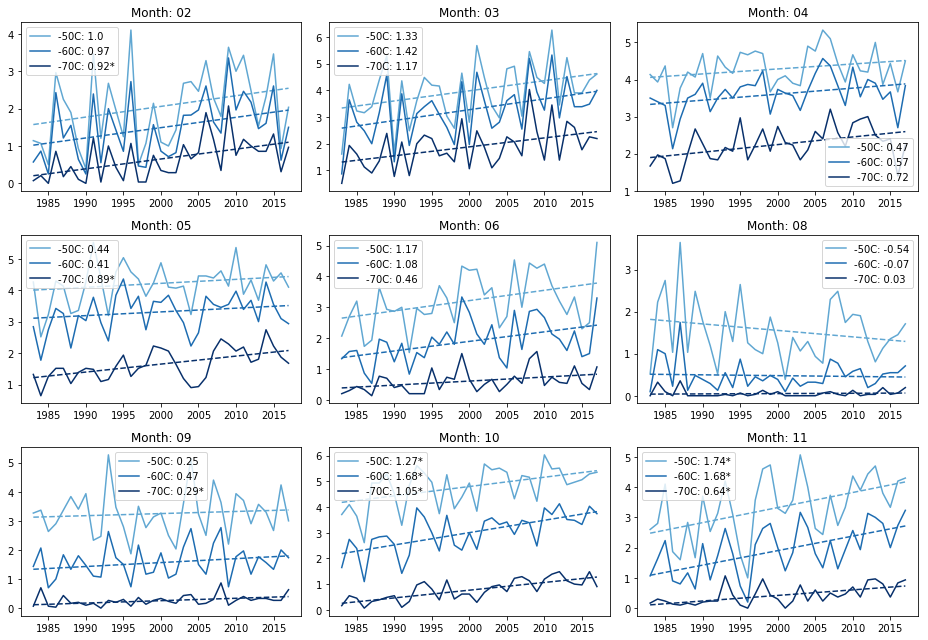

In [74]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 2

cmap = mpl.cm.get_cmap('Blues')

rgba = cmap(np.linspace(0.3,1,4))

# 
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
    
    
#     mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s40[m][xx::])
#     if mp <= 0.01:
#         sig = '*'
#     else:
#         sig = ''
#     ax.plot(years, s40[m], color=rgba[0], label='-40C: '+str(np.round(mslope*35,2))+sig)
#     ax.plot(years, mint + x*mslope, '--', color=rgba[0])  
    
   
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s50[m][xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s50[m], color=rgba[1], label='-50C: '+str(np.round(mslope*35,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[1])  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s60[m][xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s60[m], color=rgba[2], label='-60C: '+str(np.round(mslope*35,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[2])  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s70[m][xx::])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s70[m], color=rgba[3], label='-70C: '+str(np.round(mslope*35,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[3])
            
#     mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s75[m][xx::]) 
#     if mp <= 0.01:
#         sig = '*'
#     else:
#         sig = ''
#     ax.plot(years, s75[m], 'lightblue', label='-75C: '+str(np.round(mslope*35,2))+sig)
#     ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title('Month: '+str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()

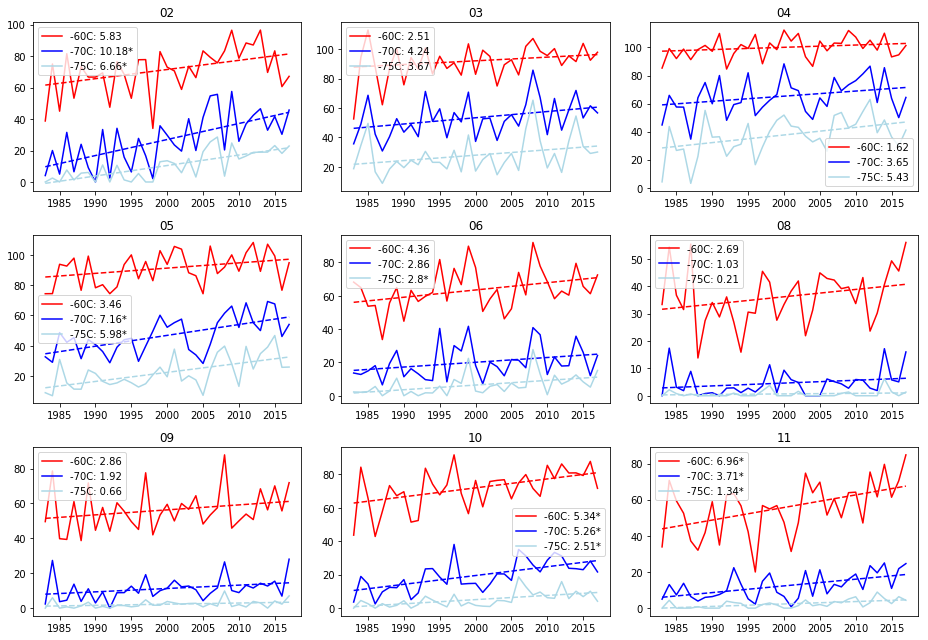

In [72]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 1
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
   
    var = (np.array(s60[m]) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    if m == 3:
        mullt = np.linspace(-0.2,+0.2,len(years))
    else:
        mullt = 0#np.linspace(-3,+3,len(years))*0
        
    var = ((np.array(s70[m]))/ np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
    var = ((np.array(s75[m])) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::]) 
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/CLOVER/fig3.jpg')

In [7]:
np.arange(4,18,2)

array([ 4,  6,  8, 10, 12, 14, 16])

In [61]:
s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-40C_5000km2_1800.p',
                        'rb'))
s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-50C_5000km2_1800.p',
                        'rb'))
s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-60C_5000km2_1800.p',
                        'rb'))
s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-70C_5000km2_1800.p',
                        'rb'))
s75 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-75C_5000km2_1800.p',
                        'rb'))

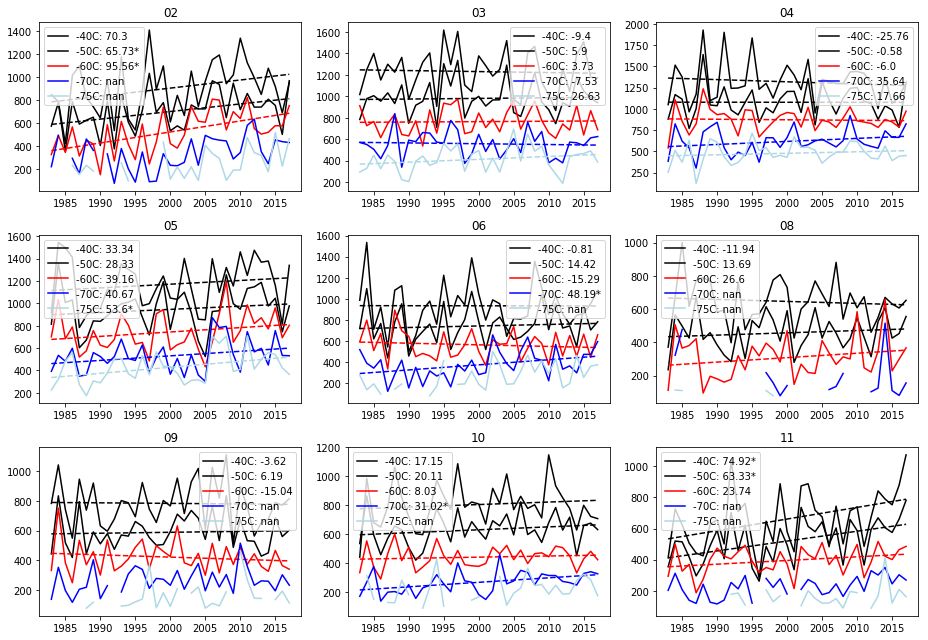

In [63]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 0
# 
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
    
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s40[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s40[m], 'k', label='-40C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  
    
   
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s50[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s50[m], 'k', label='-50C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  
    
    
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s60[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s60[m], 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s70[m][xx::])      
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s70[m], 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
            
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s75[m][xx::]) 
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s75[m], 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()

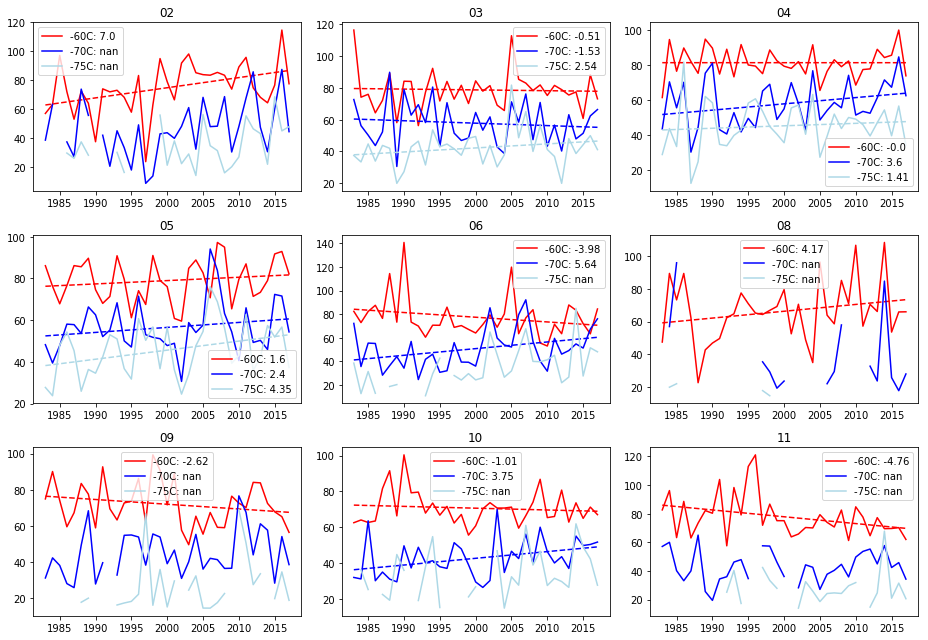

In [64]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 0
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
   
    var = (np.array(s60[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    var = (np.array(s70[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
    var = (np.array(s75[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::]) 
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()